<a href="https://colab.research.google.com/github/lucarubini/DeepLearning_quick_introduction/blob/main/tutorial/PyTorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up PyTorch

(Questo tutorial e' basato su quello proposto nella documentazione/guida della libreria [Pytorch tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) )

Importiamo `Pytorch` e tutte le librerie necessarie nel  nostro notebook per iniziare il tutorial:


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

# Load Dataset

Per questo tutorial useremo il dataset gia' configurato **MNIST**


In [ ]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Istanziamo le classi per fornire al modello i dati durante il training e il test

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

Osserviamo ora come sono fatti i dati che utilizzeremo, osserviamo come la classe fornisce tensori la cui prima dimensione coincide con il `batch_size`, cioe' il numero di dati da considerare contemporaneamente.

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64
Target: 4


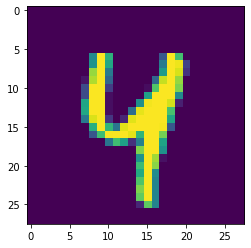

In [ ]:
#Show Image
image_test_idx = 42
plt.imshow(test_data[image_test_idx][0][0])

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    print("Target: {}".format(y[image_test_idx]))
    break

Contiamo ora il numero di esempi per ciascuna partizione del dataset

In [ ]:
#Count Elements
print("Number of train samples: {}".format(training_data.targets.numel()))
print("Number of test samples: {}".format(test_data.targets.numel()))

Number of train samples: 60000
Number of test samples: 10000


`PyTorch` necessita di specificare se si sta lavorando su gpu o cpu

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


# Build a (simple) machine learning mode
Costruiamo ora il modello definendo una classe apposita in cui implementiamo il metodo `__init__` per inizializzare il modello e poi il metodo `forward` per valutare il modello. 

Per creare il modello useremo il modulo `nn.Sequential`, in cui diversi layer saranno impilati.

L'idea per l'architettura del modello e' quella di trasformare ogni immagine in un array, 'appiatendolo' e poi configurare una rete neurale

  ![One prediction 24 hours into the future.](https://andreaprovino.it/wp-content/uploads/2020/09/tensorflow-neural-network-schema-tensorflow-mnist-tutorial-italiano-esempio-guida-tensorflow-italia-tensorflow-classification-hello-world-single-digit.png)

Tipi di layers utilizzati:
- nn.Flatten: https://pytorch.org/docs/master/generated/torch.nn.Flatten.html#flatten
- nn.Sequential: https://pytorch.org/docs/master/generated/torch.nn.Sequential.html?highlight=sequential#torch.nn.Sequential
- nn.Linear: https://pytorch.org/docs/master/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear
- nn.ReLU: https://pytorch.org/docs/master/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU

In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        # x: input istance to be flattened
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Collochiamo il modello sul corretto device e vediamo come il modello e' costituito

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


Verifichiamo ra la dimensionalita' del modello, ispezionando come i paragrafi sono implelentati al loro interno.

In [ ]:
#Count model size
#from parameters
count_model_params=sum(p.numel() for p in model.parameters() if p.requires_grad)

for W in model.parameters():
    print(W)

for i,W in enumerate(model.parameters()):
    print("W_{}.shape: {}".format(i,W.shape))
#manually (+1 is due to bias)
count_check_params=(784+1)*128+(128+1)*10

print("Model Parameters check: (784+1)*128+(128+1)*10")
print("Model Parameters count: {}".format(count_model_params))
print("Model Check count: {}".format(count_check_params))

Parameter containing:
tensor([[-0.0263,  0.0185,  0.0023,  ..., -0.0062, -0.0217, -0.0125],
        [ 0.0161,  0.0189, -0.0325,  ..., -0.0031,  0.0071, -0.0354],
        [ 0.0186, -0.0014, -0.0114,  ..., -0.0021, -0.0095, -0.0344],
        ...,
        [ 0.0024, -0.0103,  0.0147,  ..., -0.0077, -0.0115,  0.0262],
        [-0.0329,  0.0186, -0.0140,  ..., -0.0335, -0.0088, -0.0044],
        [ 0.0025, -0.0297,  0.0119,  ..., -0.0006,  0.0344, -0.0197]],
       requires_grad=True)
Parameter containing:
tensor([-1.1690e-02, -2.0543e-02,  2.5726e-02, -2.2077e-02, -1.8072e-02,
        -1.0465e-02, -1.9939e-02,  2.2652e-02, -3.4591e-02, -1.6724e-02,
        -3.5402e-02,  2.4830e-02, -1.0513e-02, -1.4199e-02,  3.3653e-02,
        -2.1050e-02, -2.2737e-02,  3.2275e-02,  8.3372e-03,  2.7036e-02,
         1.2205e-02,  1.4913e-02,  4.6065e-03, -2.8627e-02, -2.0004e-02,
        -1.7942e-02, -1.4370e-02,  1.7746e-02, -2.9038e-02,  2.9946e-02,
        -8.8730e-05, -1.4155e-02,  4.2788e-06,  1.1043e-0

In questo caso la loss che useremo richiede che la rete neurale abbia come output le logits, quindi la `softmax` e' applicata all'interno della loss.

- Guardando la documentazione della `loss` utilizzata [torch.nn.CrossEntropyLoss](https://pytorch.org/docs/master/generated/torch.nn.CrossEntropyLoss.html?highlight=crossentropyloss#torch.nn.CrossEntropyLoss) si vede che la softmax viene applicata all'interno della loss.

Usiamo poi come ottimizzatore Adam/SGD

In [ ]:
#Define Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Train and Test the Model

Definiamo ora la funzione per addestrare il modello e la funzione per valutare il modello (inference).

In [ ]:
#define train class
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Osserviamo ora come si comporta il modello per una immagine del test set, presumibilmente l'accuratezza sara' bassa, dal momento che il modello e' inizializzato casualmente. Osserviamo l'output del modello dopo la tarsformazione `softmax`, possiamo aspettarci che le probabilita' di ciascuna classe siano di valori simili, dal momento che in questo momento e' come pescare a caso.

tensor([[0.1028, 0.0919, 0.1004, 0.0933, 0.1016, 0.1170, 0.0962, 0.0861, 0.1066,
         0.1041]])
Modello: "5", Target: "4"


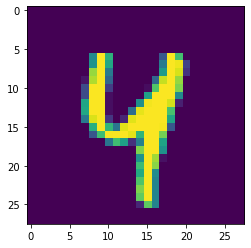

In [ ]:
x, y = test_data[image_test_idx][0], test_data[image_test_idx][1]
softmax = nn.Softmax(dim=1)
with torch.no_grad():
    pred = model(x)
    not_trained_softmax = softmax(pred)
    print("softmax (no training done):".format(not_trained_softmax))
    predicted, actual = pred[0].argmax(0), y
    print(f'Modello: "{predicted}", Target: "{actual}"')
    plt.imshow(test_data[image_test_idx][0][0])

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.296838  [    0/60000]
loss: 0.417576  [ 6400/60000]
loss: 0.277431  [12800/60000]
loss: 0.341728  [19200/60000]
loss: 0.222658  [25600/60000]
loss: 0.320681  [32000/60000]
loss: 0.150208  [38400/60000]
loss: 0.340063  [44800/60000]
loss: 0.297121  [51200/60000]
loss: 0.305866  [57600/60000]
Test Error: 
 Accuracy: 93.8%, Avg loss: 0.202457 

Epoch 2
-------------------------------
loss: 0.129956  [    0/60000]
loss: 0.201932  [ 6400/60000]
loss: 0.108646  [12800/60000]
loss: 0.184935  [19200/60000]
loss: 0.147004  [25600/60000]
loss: 0.234245  [32000/60000]
loss: 0.062713  [38400/60000]
loss: 0.239534  [44800/60000]
loss: 0.196978  [51200/60000]
loss: 0.205869  [57600/60000]
Test Error: 
 Accuracy: 95.3%, Avg loss: 0.150069 

Epoch 3
-------------------------------
loss: 0.088800  [    0/60000]
loss: 0.146475  [ 6400/60000]
loss: 0.077432  [12800/60000]
loss: 0.101199  [19200/60000]
loss: 0.104628  [25600/60000]
loss: 0.184861  [32000/600

Siamo riusciti a raggiungere un'accuratezza `>95%`, utilizzando un modello tutto sommato semplice come architeuttra.

Osserviamo ora come il modello si comporta sugli stessi dati che avevamo visto in precedenza una volta che e' stato inizializzato.

softmax (no training done): tensor([[0.1028, 0.0919, 0.1004, 0.0933, 0.1016, 0.1170, 0.0962, 0.0861, 0.1066,
         0.1041]])
softmax (training done): tensor([[1.8291e-11, 3.4304e-09, 3.3936e-09, 3.8849e-07, 9.9993e-01, 2.4000e-07,
         1.0028e-11, 4.1489e-05, 1.4073e-06, 2.7988e-05]])
Modello: "4", Target: "4"


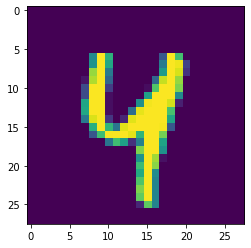

In [ ]:
x, y = test_data[image_test_idx][0], test_data[image_test_idx][1]
with torch.no_grad():
    pred = model(x)
    trained_softmax = softmax(pred)
    print("softmax (no training done): {}".format(not_trained_softmax))
    print("softmax (training done): {}".format(trained_softmax))
    predicted, actual = pred[0].argmax(0), y
    print(f'Modello: "{predicted}", Target: "{actual}"')
    plt.imshow(test_data[image_test_idx][0][0])

# Conclusion
Congratulazioni abbiamo terminato il tutorial di `PyTorch`. Per ulteriori dettagli e informazioni visita il sito ufficiale di [PyTorch](https://pytorch.org/).